In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
data = pd.read_csv("https://skillsmart.ru/data/apples_pears.csv")

In [5]:
data.head()

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


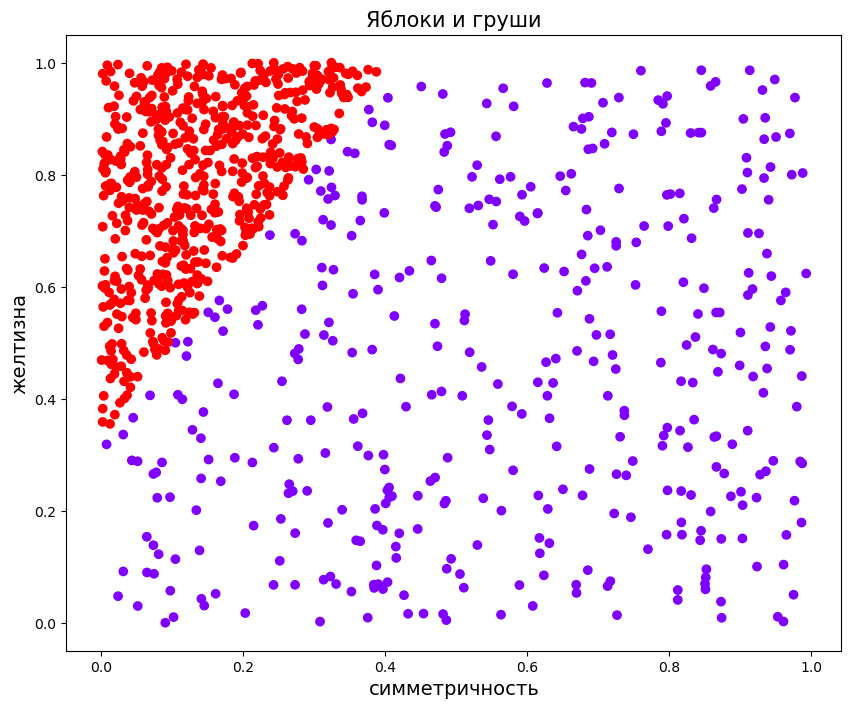

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 1], data.iloc[:, 0], c=data['target'], cmap='rainbow')
plt.title("Яблоки и груши", fontsize=15)
plt.xlabel("симметричность", fontsize=14)
plt.ylabel("желтизна", fontsize=14)
plt.show()

In [8]:
import numpy as numpy
from torch.nn import Linear, Sigmoid

In [9]:
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(yhat, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss
    return train_step

In [14]:
X = torch.FloatTensor(data.iloc[:, :2].values)

y = torch.FloatTensor(data['target'].values.reshape((-1, 1)))

In [16]:
X.data.shape, y.data.shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

In [31]:
from torch import optim, nn

neuron = torch.nn.Sequential(
    Linear(2, out_features=1),
    Sigmoid()
)
print(neuron.state_dict())

OrderedDict([('0.weight', tensor([[0.5204, 0.1948]])), ('0.bias', tensor([0.5507]))])


In [35]:
lr = 0.1
n_epochs = 10000
loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.SGD(neuron.parameters(), lr=lr)
train_step = make_train_step(neuron, loss_fn, optimizer)

In [36]:
for epoch in range(n_epochs):
    loss = train_step(X, y)

print(f"Neuron state is {neuron.state_dict()}")
print(f"Loss is {loss}")

Neuron state is OrderedDict([('0.weight', tensor([[ 5.5511, -8.2077]])), ('0.bias', tensor([-1.1556]))])
Loss is 0.03917984664440155


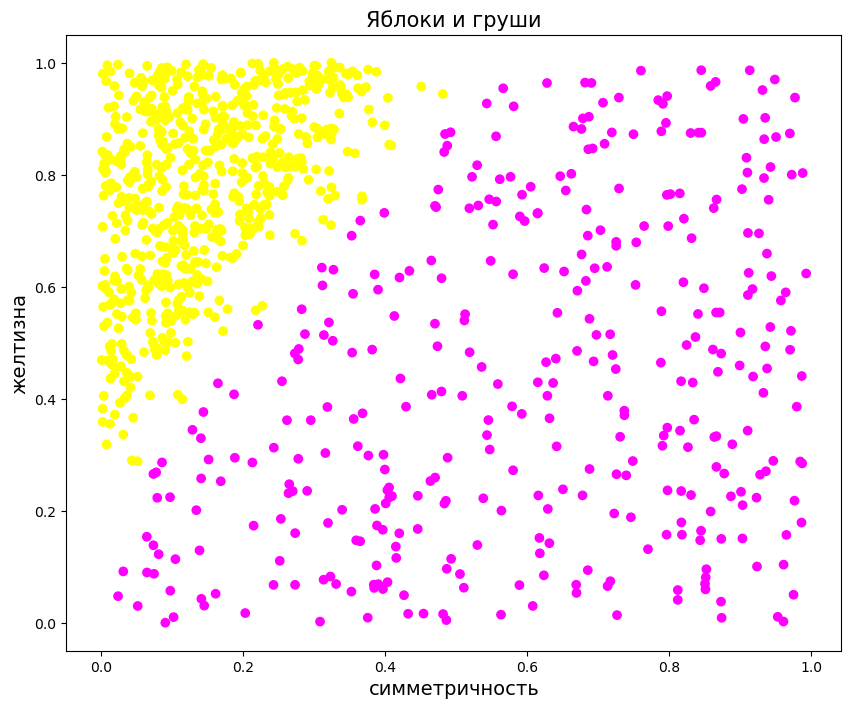

In [37]:
neuro_data = neuron(X)
y2 = neuro_data > 0.5
y2 = y2.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.symmetry, data.yellowness, c=y2, cmap="spring")
plt.title("Яблоки и груши", fontsize=15)
plt.xlabel("симметричность", fontsize=14)
plt.ylabel("желтизна", fontsize=14)
plt.show()